In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
df = pd.read_csv("../data/Test Data - Recruitments 2024 - Test Dataset - GPL.csv")
df_original = df.copy()
df

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA-2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH
0,male,23,DASA,8.60,8,NaN,CBSE,14,12/10/2001,3,YES,YES,LITE,16082,9.60
1,female,23,DASA,6.92,4,NaN,ICSE,1,10/4/2001,2,YES,YES,LITE,3308,0.35
2,male,17,BITSAT,4.46,7,NaN,CBSE,3,10/9/2007,3,YES,NO,GHOT,18004,1.00
3,female,20,BOARD TOPPER,6.16,4,NaN,ICSE,7,5/17/2004,4,YES,NO,GHOT,5870,0.50
4,male,19,BITSAT,7.12,4,NaN,CBSE,4,11/16/2005,3,FALSE,NO,GHOT,18351,9.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,male,17,BITSAT,3.11,7,NaN,CBSE,6,7/20/2007,2,FALSE,NO,LITE,16780,9.60
196,female,21,DASA,4.03,7,NaN,ICSE,2,12/15/2003,3,FALSE,NO,LITE,5308,0.35
197,male,21,BITSAT,5.31,4,NaN,CBSE,14,10/2/2003,3,FALSE,NO,LITE,16917,11.00
198,male,17,BITSAT,4.81,4,NaN,CBSE,2,4/3/2007,1,FALSE,NO,LITE,20326,4.70


In [3]:
df.dtypes

SEX                               object
AGES                               int64
ADMISSION MODE                    object
CGPA - 1                         float64
CGPA-2                             int64
 CLUB / DEPARTMENT                object
BOARD STUDIED                     object
DAYS SINCE LAST SHOWER             int64
BIRTHDAY                          object
TREATS GIVEN                       int64
 HAS A S/O ?                      object
ATTENDS LECTURES                  object
CHARACTER                         object
PIZZERIA EXPENDITURE (annual)      int64
GRAMS / MONTH                    float64
dtype: object

In [4]:
df = df.rename(columns={" AGES":"AGES", "CGPA-2":"CGPA - 2", " HAS A S/O ?": "HAS A S/O ?", " CLUB / DEPARTMENT": "CLUB / DEPARTMENT"})
df.columns

Index(['SEX', 'AGES', 'ADMISSION MODE', 'CGPA - 1', 'CGPA - 2',
       'CLUB / DEPARTMENT', 'BOARD STUDIED', 'DAYS SINCE LAST SHOWER',
       'BIRTHDAY', 'TREATS GIVEN', 'HAS A S/O ?', 'ATTENDS LECTURES',
       'CHARACTER', 'PIZZERIA EXPENDITURE (annual)', 'GRAMS / MONTH'],
      dtype='object')

#### Cleaning:

<Axes: xlabel='CGPA - 1'>

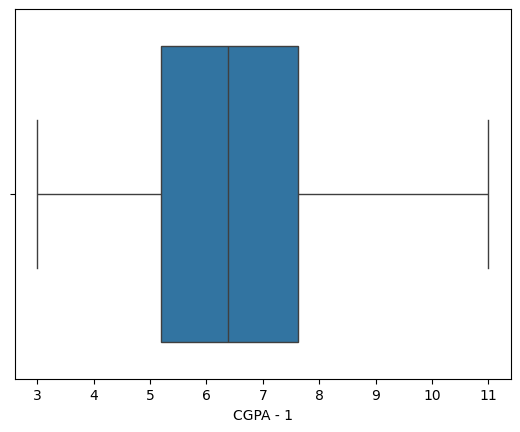

In [5]:
sns.boxplot(data=df, x='CGPA - 1')

In [6]:
df.loc[df['CGPA - 1'] > 10, 'CGPA - 1'] = 10;
df.loc[df['CGPA - 1'] > 10, 'CGPA - 2'] = 10;

### Encoding

In [7]:
admissionConverted = pd.get_dummies(df['ADMISSION MODE'], drop_first=True)
boardConverted = pd.get_dummies(df['BOARD STUDIED'], drop_first=True)
characterConverted = pd.get_dummies(df['CHARACTER'], drop_first=True)
sexConverted = pd.get_dummies(df['SEX'], drop_first=True)
clubConverted = pd.get_dummies(df['CLUB / DEPARTMENT'])

df = pd.concat([sexConverted, df['AGES'], admissionConverted, df['CGPA - 1'], df['CGPA - 2'], 
           clubConverted, boardConverted, df['DAYS SINCE LAST SHOWER'], df['TREATS GIVEN'], 
           df['HAS A S/O ?'], df['ATTENDS LECTURES'], characterConverted, df['PIZZERIA EXPENDITURE (annual)'], 
           df['GRAMS / MONTH']], axis=1)

df ['HAS A S/O ?'].unique()
df.loc[df['HAS A S/O ?']=='YES', 'HAS A S/O ?'] = True
df.loc[df['HAS A S/O ?']=='FALSE', 'HAS A S/O ?'] = False
df.loc[df['HAS A S/O ?']=='NO', 'HAS A S/O ?'] = False

df['ATTENDS LECTURES'].unique()
df.loc[df['ATTENDS LECTURES']=='YES', 'ATTENDS LECTURES'] = True
df.loc[df['ATTENDS LECTURES']=='NO', 'ATTENDS LECTURES'] = False
for col in list(df.columns):
    df[col] = df[col].astype('float32')

df['None'] = 0
df['GPL'] = 0
df = df[list(('male', 'AGES', 'BOARD TOPPER', 'DASA', 'CGPA - 1', 'CGPA - 2', 'DVM', 'Gaming Club', 'Mountaineering', 'None', 'ICSE', 'Other', 'DAYS SINCE LAST SHOWER', 'TREATS GIVEN', 'HAS A S/O ?', 'ATTENDS LECTURES', 'LITE', 'PIZZERIA EXPENDITURE (annual)', 'GRAMS / MONTH', 'GPL'))]
df

,male,AGES,BOARD TOPPER,DASA,CGPA - 1,CGPA - 2,DVM,Gaming Club,Mountaineering,None,ICSE,Other,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,LITE,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,1.0,23.0,0.0,1.0,8.60,8.0,0.0,0.0,0.0,0,0.0,0.0,14.0,3.0,1.0,1.0,1.0,16082.0,9.60,0
1,0.0,23.0,0.0,1.0,6.92,4.0,0.0,0.0,0.0,0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,3308.0,0.35,0
2,1.0,17.0,0.0,0.0,4.46,7.0,0.0,0.0,0.0,0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,18004.0,1.00,0
3,0.0,20.0,1.0,0.0,6.16,4.0,0.0,0.0,0.0,0,1.0,0.0,7.0,4.0,1.0,0.0,0.0,5870.0,0.50,0
4,1.0,19.0,0.0,0.0,7.12,4.0,0.0,0.0,0.0,0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,18351.0,9.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,17.0,0.0,0.0,3.11,7.0,0.0,0.0,0.0,0,0.0,0.0,6.0,2.0,0.0,0.0,1.0,16780.0,9.60,0
196,0.0,21.0,0.0,1.0,4.03,7.0,0.0,0.0,0.0,0,1.0,0.0,2.0,3.0,0.0,0.0,1.0,5308.0,0.35,0
197,1.0,21.0,0.0,0.0,5.31,4.0,0.0,0.0,0.0,0,0.0,0.0,14.0,3.0,0.0,0.0,1.0,16917.0,11.00,0
198,1.0,17.0,0.0,0.0,4.81,4.0,0.0,0.0,0.0,0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,20326.0,4.70,0


In [8]:
import joblib

scaler = joblib.load('../data/scaler.save')
scaler

cols = list(df.columns)
df = scaler.transform(df)
df = pd.DataFrame(df)
df.columns = cols

df = df[['male', 'DASA', 'DVM', 'ATTENDS LECTURES', 'LITE', 'TREATS GIVEN', 'PIZZERIA EXPENDITURE (annual)','GRAMS / MONTH']]
cols = df.columns

In [9]:
df

,male,DASA,DVM,ATTENDS LECTURES,LITE,TREATS GIVEN,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH
0,1.0,1.0,0.0,1.0,1.0,0.75,0.730331,0.870968
1,0.0,1.0,0.0,1.0,1.0,0.50,0.146377,0.018433
2,1.0,0.0,0.0,0.0,0.0,0.75,0.818194,0.078341
3,0.0,0.0,0.0,0.0,0.0,1.00,0.263497,0.032258
4,1.0,0.0,0.0,0.0,0.0,0.75,0.834057,0.843318
...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,1.0,0.50,0.762240,0.870968
196,0.0,1.0,0.0,0.0,1.0,0.75,0.237806,0.018433
197,1.0,0.0,0.0,0.0,1.0,0.75,0.768503,1.000000
198,1.0,0.0,0.0,0.0,1.0,0.25,0.924343,0.419355


### Predicting

In [10]:
from torch import nn

hidden_nodes = 10
in_features = 8

class ModelV3(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=in_features, out_features=hidden_nodes)
        self.linear_2 = nn.Linear(in_features=hidden_nodes, out_features=hidden_nodes)
        self.linear_3 = nn.Linear(in_features=hidden_nodes, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x)))))
    
model = ModelV3()
model.load_state_dict(torch.load("../models/model_3.pth"))
model

ModelV3(
  (linear_1): Linear(in_features=8, out_features=10, bias=True)
  (linear_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
model = model.to(device)
input_tensor = torch.Tensor(df.values)
input_tensor = input_tensor.to(device)

model.eval()
with torch.inference_mode():
    pred_logits = model(torch.Tensor(df.values)).squeeze()
    pred_labels = torch.round(torch.sigmoid(pred_logits))
    pred_labels

model = model.to("cpu")
input_tensor = input_tensor.to("cpu")

In [13]:
pred_df = pd.DataFrame(pred_labels.detach().numpy())
pred_df.columns = ['GPL']
pred_df['GPL'] = pred_df['GPL'].astype('object')
pred_df.loc[pred_df['GPL']==0, 'GPL'] = 'NO'
pred_df.loc[pred_df['GPL']==1, 'GPL'] = 'YES'
pred_df

,GPL
0,NO
1,YES
2,NO
3,YES
4,NO
...,...
195,NO
196,YES
197,NO
198,NO


In [14]:
df_original['GPL'] = pred_df['GPL']
df_original

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA-2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,male,23,DASA,8.60,8,NaN,CBSE,14,12/10/2001,3,YES,YES,LITE,16082,9.60,NO
1,female,23,DASA,6.92,4,NaN,ICSE,1,10/4/2001,2,YES,YES,LITE,3308,0.35,YES
2,male,17,BITSAT,4.46,7,NaN,CBSE,3,10/9/2007,3,YES,NO,GHOT,18004,1.00,NO
3,female,20,BOARD TOPPER,6.16,4,NaN,ICSE,7,5/17/2004,4,YES,NO,GHOT,5870,0.50,YES
4,male,19,BITSAT,7.12,4,NaN,CBSE,4,11/16/2005,3,FALSE,NO,GHOT,18351,9.30,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,male,17,BITSAT,3.11,7,NaN,CBSE,6,7/20/2007,2,FALSE,NO,LITE,16780,9.60,NO
196,female,21,DASA,4.03,7,NaN,ICSE,2,12/15/2003,3,FALSE,NO,LITE,5308,0.35,YES
197,male,21,BITSAT,5.31,4,NaN,CBSE,14,10/2/2003,3,FALSE,NO,LITE,16917,11.00,NO
198,male,17,BITSAT,4.81,4,NaN,CBSE,2,4/3/2007,1,FALSE,NO,LITE,20326,4.70,NO


In [15]:
df_original.to_csv("../5_results/test_predictions.csv", encoding='utf-8', index=False)